## Implementation

In [1]:
import tensorflow as tf
print('Tensorflow version : {}'.format(tf.__version__))
print('GPU : {}'.format(tf.config.list_physical_devices('GPU')))
#tf.config.experimental.list_physical_devices('GPU')
from tensorflow import keras
import tensorflow.keras.backend as K

Tensorflow version : 2.4.0
GPU : []


In [34]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Concatenate, concatenate, Dense, Dropout, LeakyReLU, Reshape, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Lambda, Activation, Flatten, Convolution1D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
#from tensorflow.keras.utils import np_utils
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import Model, Input
from tensorflow.keras.applications.vgg19 import VGG19
#from keras_squeezenet_tf2 import SqueezeNet
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#https://github.com/sivaramakrishnan-rajaraman/Deep-Neural-Ensembles-toward-Malaria-Parasite-Detection-in-Thin-Blood-Smear-Images/blob/master/model_ensemble.ipynb

In [11]:
#splitfolders.ratio('../data/cell_images', output='../data/cell_images/', seed=1337, ratio=(.8, 0.1,0.1)) 


Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:07,  7.63s/ files]
Copying files: 13 files [00:07,  5.34s/ files]
Copying files: 27 files [00:07,  3.74s/ files]
Copying files: 39 files [00:07,  2.62s/ files]
Copying files: 54 files [00:08,  1.84s/ files]
Copying files: 67 files [00:08,  1.29s/ files]
Copying files: 79 files [00:08,  1.11 files/s]
Copying files: 92 files [00:08,  1.57 files/s]
Copying files: 104 files [00:08,  2.24 files/s]
Copying files: 118 files [00:08,  3.17 files/s]
Copying files: 131 files [00:08,  4.47 files/s]
Copying files: 143 files [00:08,  6.29 files/s]
Copying files: 157 files [00:08,  8.80 files/s]
Copying files: 170 files [00:08, 12.18 files/s]
Copying files: 184 files [00:09, 16.74 files/s]
Copying files: 197 files [00:09, 22.45 files/s]
Copying files: 211 files [00:09, 29.98 files/s]
Copying files: 225 files [00:09, 39.19 files/s]
Copying files: 238 files [00:09, 48.43 files/s]
Copying files: 251 files [00:09, 57.52 files/s]
Copyin

Copying files: 1815 files [00:25, 102.11 files/s]
Copying files: 1826 files [00:25, 103.28 files/s]
Copying files: 1837 files [00:25, 100.84 files/s]
Copying files: 1848 files [00:25, 103.26 files/s]
Copying files: 1859 files [00:25, 101.44 files/s]
Copying files: 1870 files [00:26, 101.06 files/s]
Copying files: 1881 files [00:26, 102.85 files/s]
Copying files: 1892 files [00:26, 94.26 files/s] 
Copying files: 1903 files [00:26, 95.82 files/s]
Copying files: 1913 files [00:26, 96.70 files/s]
Copying files: 1924 files [00:26, 99.00 files/s]
Copying files: 1935 files [00:26, 99.36 files/s]
Copying files: 1945 files [00:26, 97.09 files/s]
Copying files: 1955 files [00:26, 95.36 files/s]
Copying files: 1965 files [00:27, 92.86 files/s]
Copying files: 1975 files [00:27, 91.82 files/s]
Copying files: 1986 files [00:27, 95.79 files/s]
Copying files: 1997 files [00:27, 98.76 files/s]
Copying files: 2008 files [00:27, 101.42 files/s]
Copying files: 2019 files [00:27, 97.58 files/s] 
Copying fi

Copying files: 3606 files [00:42, 115.10 files/s]
Copying files: 3618 files [00:42, 113.75 files/s]
Copying files: 3630 files [00:42, 115.19 files/s]
Copying files: 3643 files [00:42, 116.38 files/s]
Copying files: 3655 files [00:42, 113.92 files/s]
Copying files: 3668 files [00:42, 117.99 files/s]
Copying files: 3680 files [00:42, 115.82 files/s]
Copying files: 3693 files [00:42, 119.02 files/s]
Copying files: 3706 files [00:42, 119.80 files/s]
Copying files: 3719 files [00:43, 118.06 files/s]
Copying files: 3733 files [00:43, 122.40 files/s]
Copying files: 3746 files [00:43, 121.13 files/s]
Copying files: 3759 files [00:43, 118.64 files/s]
Copying files: 3772 files [00:43, 120.92 files/s]
Copying files: 3785 files [00:43, 120.35 files/s]
Copying files: 3798 files [00:43, 119.62 files/s]
Copying files: 3810 files [00:43, 118.51 files/s]
Copying files: 3822 files [00:43, 115.28 files/s]
Copying files: 3834 files [00:44, 113.75 files/s]
Copying files: 3846 files [00:44, 113.97 files/s]


Copying files: 5425 files [00:58, 105.01 files/s]
Copying files: 5437 files [00:58, 107.85 files/s]
Copying files: 5448 files [00:58, 106.36 files/s]
Copying files: 5460 files [00:59, 109.69 files/s]
Copying files: 5473 files [00:59, 114.51 files/s]
Copying files: 5485 files [00:59, 115.62 files/s]
Copying files: 5497 files [00:59, 116.45 files/s]
Copying files: 5509 files [00:59, 115.56 files/s]
Copying files: 5521 files [00:59, 113.51 files/s]
Copying files: 5533 files [00:59, 113.92 files/s]
Copying files: 5545 files [00:59, 115.49 files/s]
Copying files: 5557 files [00:59, 112.10 files/s]
Copying files: 5569 files [01:00, 111.75 files/s]
Copying files: 5581 files [01:00, 111.13 files/s]
Copying files: 5593 files [01:00, 113.30 files/s]
Copying files: 5605 files [01:00, 113.10 files/s]
Copying files: 5617 files [01:00, 111.35 files/s]
Copying files: 5629 files [01:00, 113.42 files/s]
Copying files: 5641 files [01:00, 114.40 files/s]
Copying files: 5653 files [01:00, 111.46 files/s]


Copying files: 7201 files [01:15, 113.36 files/s]
Copying files: 7213 files [01:15, 113.83 files/s]
Copying files: 7225 files [01:15, 110.21 files/s]
Copying files: 7237 files [01:16, 110.91 files/s]
Copying files: 7249 files [01:16, 111.06 files/s]
Copying files: 7261 files [01:16, 109.46 files/s]
Copying files: 7273 files [01:16, 111.52 files/s]
Copying files: 7285 files [01:16, 112.89 files/s]
Copying files: 7297 files [01:16, 110.54 files/s]
Copying files: 7309 files [01:16, 112.20 files/s]
Copying files: 7321 files [01:16, 113.68 files/s]
Copying files: 7333 files [01:16, 111.06 files/s]
Copying files: 7345 files [01:17, 110.78 files/s]
Copying files: 7357 files [01:17, 108.21 files/s]
Copying files: 7368 files [01:17, 106.79 files/s]
Copying files: 7380 files [01:17, 108.29 files/s]
Copying files: 7392 files [01:17, 110.25 files/s]
Copying files: 7404 files [01:17, 106.08 files/s]
Copying files: 7416 files [01:17, 108.55 files/s]
Copying files: 7428 files [01:17, 111.57 files/s]


Copying files: 9027 files [01:32, 121.83 files/s]
Copying files: 9040 files [01:32, 119.33 files/s]
Copying files: 9052 files [01:32, 116.88 files/s]
Copying files: 9066 files [01:32, 121.27 files/s]
Copying files: 9079 files [01:32, 121.28 files/s]
Copying files: 9092 files [01:32, 119.90 files/s]
Copying files: 9105 files [01:32, 119.22 files/s]
Copying files: 9117 files [01:33, 118.57 files/s]
Copying files: 9129 files [01:33, 115.42 files/s]
Copying files: 9142 files [01:33, 116.94 files/s]
Copying files: 9154 files [01:33, 116.61 files/s]
Copying files: 9167 files [01:33, 119.73 files/s]
Copying files: 9180 files [01:33, 117.37 files/s]
Copying files: 9193 files [01:33, 120.56 files/s]
Copying files: 9206 files [01:33, 119.86 files/s]
Copying files: 9219 files [01:33, 118.16 files/s]
Copying files: 9232 files [01:34, 119.95 files/s]
Copying files: 9245 files [01:34, 118.35 files/s]
Copying files: 9258 files [01:34, 120.88 files/s]
Copying files: 9271 files [01:34, 118.91 files/s]


Copying files: 10977 files [01:48, 124.48 files/s]
Copying files: 10990 files [01:48, 122.07 files/s]
Copying files: 11003 files [01:48, 122.54 files/s]
Copying files: 11016 files [01:49, 120.11 files/s]
Copying files: 11029 files [01:49, 120.64 files/s]
Copying files: 11042 files [01:49, 117.09 files/s]
Copying files: 11056 files [01:49, 120.69 files/s]
Copying files: 11070 files [01:49, 124.00 files/s]
Copying files: 11083 files [01:49, 122.30 files/s]
Copying files: 11096 files [01:49, 118.99 files/s]
Copying files: 11110 files [01:49, 122.63 files/s]
Copying files: 11123 files [01:49, 123.90 files/s]
Copying files: 11136 files [01:50, 120.86 files/s]
Copying files: 11149 files [01:50, 121.42 files/s]
Copying files: 11162 files [01:50, 118.81 files/s]
Copying files: 11175 files [01:50, 120.25 files/s]
Copying files: 11188 files [01:50, 118.53 files/s]
Copying files: 11201 files [01:50, 116.75 files/s]
Copying files: 11213 files [01:50, 116.40 files/s]
Copying files: 11226 files [01:

Copying files: 12879 files [02:05, 123.97 files/s]
Copying files: 12892 files [02:05, 120.05 files/s]
Copying files: 12905 files [02:05, 121.95 files/s]
Copying files: 12918 files [02:05, 122.65 files/s]
Copying files: 12931 files [02:05, 123.22 files/s]
Copying files: 12944 files [02:05, 118.33 files/s]
Copying files: 12958 files [02:05, 122.28 files/s]
Copying files: 12971 files [02:05, 118.49 files/s]
Copying files: 12984 files [02:06, 118.02 files/s]
Copying files: 12997 files [02:06, 119.70 files/s]
Copying files: 13010 files [02:06, 117.74 files/s]
Copying files: 13023 files [02:06, 120.72 files/s]
Copying files: 13036 files [02:06, 122.54 files/s]
Copying files: 13049 files [02:06, 123.83 files/s]
Copying files: 13062 files [02:06, 119.29 files/s]
Copying files: 13075 files [02:06, 120.49 files/s]
Copying files: 13088 files [02:06, 122.29 files/s]
Copying files: 13101 files [02:06, 123.16 files/s]
Copying files: 13114 files [02:07, 118.07 files/s]
Copying files: 13127 files [02:

Copying files: 14863 files [02:28, 124.08 files/s]
Copying files: 14876 files [02:29, 125.47 files/s]
Copying files: 14889 files [02:29, 126.69 files/s]
Copying files: 14902 files [02:29, 121.87 files/s]
Copying files: 14915 files [02:29, 123.02 files/s]
Copying files: 14929 files [02:29, 125.70 files/s]
Copying files: 14942 files [02:29, 126.05 files/s]
Copying files: 14955 files [02:29, 120.46 files/s]
Copying files: 14968 files [02:29, 121.01 files/s]
Copying files: 14981 files [02:29, 121.59 files/s]
Copying files: 14994 files [02:30, 122.36 files/s]
Copying files: 15007 files [02:30, 84.18 files/s] 
Copying files: 15020 files [02:30, 93.76 files/s]
Copying files: 15034 files [02:30, 102.66 files/s]
Copying files: 15046 files [02:30, 102.49 files/s]
Copying files: 15059 files [02:30, 109.35 files/s]
Copying files: 15072 files [02:30, 112.42 files/s]
Copying files: 15085 files [02:30, 115.42 files/s]
Copying files: 15099 files [02:31, 119.81 files/s]
Copying files: 15112 files [02:3

Copying files: 16908 files [02:45, 129.65 files/s]
Copying files: 16923 files [02:45, 132.92 files/s]
Copying files: 16938 files [02:45, 136.38 files/s]
Copying files: 16952 files [02:45, 129.24 files/s]
Copying files: 16966 files [02:45, 128.42 files/s]
Copying files: 16980 files [02:45, 130.71 files/s]
Copying files: 16994 files [02:46, 133.06 files/s]
Copying files: 17008 files [02:46, 133.16 files/s]
Copying files: 17022 files [02:46, 127.03 files/s]
Copying files: 17035 files [02:46, 127.45 files/s]
Copying files: 17048 files [02:46, 125.58 files/s]
Copying files: 17061 files [02:46, 119.29 files/s]
Copying files: 17074 files [02:46, 121.38 files/s]
Copying files: 17088 files [02:46, 124.33 files/s]
Copying files: 17101 files [02:46, 121.85 files/s]
Copying files: 17115 files [02:47, 126.10 files/s]
Copying files: 17129 files [02:47, 128.68 files/s]
Copying files: 17142 files [02:47, 120.82 files/s]
Copying files: 17155 files [02:47, 122.18 files/s]
Copying files: 17168 files [02:

Copying files: 18994 files [03:02, 120.92 files/s]
Copying files: 19007 files [03:02, 121.12 files/s]
Copying files: 19020 files [03:02, 123.31 files/s]
Copying files: 19033 files [03:02, 121.51 files/s]
Copying files: 19046 files [03:03, 116.88 files/s]
Copying files: 19060 files [03:03, 121.40 files/s]
Copying files: 19073 files [03:03, 120.19 files/s]
Copying files: 19086 files [03:03, 119.48 files/s]
Copying files: 19099 files [03:03, 121.70 files/s]
Copying files: 19112 files [03:03, 122.37 files/s]
Copying files: 19125 files [03:03, 121.95 files/s]
Copying files: 19138 files [03:03, 123.60 files/s]
Copying files: 19151 files [03:03, 119.88 files/s]
Copying files: 19164 files [03:04, 122.06 files/s]
Copying files: 19177 files [03:04, 124.24 files/s]
Copying files: 19191 files [03:04, 126.92 files/s]
Copying files: 19204 files [03:04, 124.02 files/s]
Copying files: 19217 files [03:04, 125.41 files/s]
Copying files: 19230 files [03:04, 124.95 files/s]
Copying files: 19243 files [03:

Copying files: 20996 files [03:19, 112.38 files/s]
Copying files: 21010 files [03:19, 118.10 files/s]
Copying files: 21023 files [03:19, 120.20 files/s]
Copying files: 21036 files [03:19, 119.50 files/s]
Copying files: 21051 files [03:19, 126.71 files/s]
Copying files: 21064 files [03:19, 121.11 files/s]
Copying files: 21077 files [03:19, 123.50 files/s]
Copying files: 21091 files [03:20, 125.78 files/s]
Copying files: 21104 files [03:20, 125.26 files/s]
Copying files: 21117 files [03:20, 120.97 files/s]
Copying files: 21130 files [03:20, 119.10 files/s]
Copying files: 21143 files [03:20, 120.94 files/s]
Copying files: 21157 files [03:20, 125.34 files/s]
Copying files: 21170 files [03:20, 125.71 files/s]
Copying files: 21183 files [03:20, 120.59 files/s]
Copying files: 21196 files [03:20, 120.03 files/s]
Copying files: 21209 files [03:21, 121.04 files/s]
Copying files: 21222 files [03:21, 121.26 files/s]
Copying files: 21235 files [03:21, 114.19 files/s]
Copying files: 21248 files [03:

Copying files: 22968 files [03:35, 119.70 files/s]
Copying files: 22981 files [03:35, 121.24 files/s]
Copying files: 22995 files [03:35, 124.16 files/s]
Copying files: 23008 files [03:36, 117.07 files/s]
Copying files: 23020 files [03:36, 117.87 files/s]
Copying files: 23033 files [03:36, 120.20 files/s]
Copying files: 23046 files [03:36, 121.21 files/s]
Copying files: 23059 files [03:36, 116.70 files/s]
Copying files: 23072 files [03:36, 118.08 files/s]
Copying files: 23084 files [03:36, 114.14 files/s]
Copying files: 23098 files [03:36, 118.97 files/s]
Copying files: 23110 files [03:36, 114.43 files/s]
Copying files: 23122 files [03:37, 112.56 files/s]
Copying files: 23136 files [03:37, 118.52 files/s]
Copying files: 23149 files [03:37, 116.69 files/s]
Copying files: 23162 files [03:37, 120.32 files/s]
Copying files: 23175 files [03:37, 119.94 files/s]
Copying files: 23188 files [03:37, 121.58 files/s]
Copying files: 23201 files [03:37, 120.16 files/s]
Copying files: 23214 files [03:

Copying files: 24904 files [03:52, 112.55 files/s]
Copying files: 24916 files [03:52, 113.10 files/s]
Copying files: 24928 files [03:52, 114.47 files/s]
Copying files: 24940 files [03:52, 116.06 files/s]
Copying files: 24952 files [03:52, 116.40 files/s]
Copying files: 24964 files [03:52, 112.24 files/s]
Copying files: 24977 files [03:52, 114.91 files/s]
Copying files: 24990 files [03:52, 116.65 files/s]
Copying files: 25002 files [03:52, 114.60 files/s]
Copying files: 25014 files [03:52, 113.59 files/s]
Copying files: 25028 files [03:53, 119.75 files/s]
Copying files: 25041 files [03:53, 121.94 files/s]
Copying files: 25055 files [03:53, 126.03 files/s]
Copying files: 25068 files [03:53, 125.01 files/s]
Copying files: 25081 files [03:53, 120.27 files/s]
Copying files: 25094 files [03:53, 122.07 files/s]
Copying files: 25107 files [03:53, 121.86 files/s]
Copying files: 25120 files [03:53, 122.81 files/s]
Copying files: 25134 files [03:53, 125.72 files/s]
Copying files: 25147 files [03:

Copying files: 26851 files [04:08, 120.52 files/s]
Copying files: 26866 files [04:08, 125.99 files/s]
Copying files: 26879 files [04:08, 126.23 files/s]
Copying files: 26892 files [04:08, 127.30 files/s]
Copying files: 26905 files [04:08, 126.36 files/s]
Copying files: 26918 files [04:08, 124.43 files/s]
Copying files: 26931 files [04:08, 124.86 files/s]
Copying files: 26944 files [04:09, 117.65 files/s]
Copying files: 26956 files [04:09, 116.81 files/s]
Copying files: 26969 files [04:09, 117.30 files/s]
Copying files: 26983 files [04:09, 122.02 files/s]
Copying files: 26996 files [04:09, 122.72 files/s]
Copying files: 27009 files [04:09, 124.41 files/s]
Copying files: 27022 files [04:09, 118.80 files/s]
Copying files: 27036 files [04:09, 123.23 files/s]
Copying files: 27049 files [04:09, 123.24 files/s]
Copying files: 27063 files [04:10, 126.20 files/s]
Copying files: 27076 files [04:10, 126.98 files/s]
Copying files: 27089 files [04:10, 121.02 files/s]
Copying files: 27102 files [04:

In [36]:
#%% Loading the data

img_width, img_height = 100, 100
train_data_dir = '../data/cell_images/train'
validation_data_dir = '../data/cell_images/test'
epochs = 1#60
batch_size = 16 
num_classes= 2

# Since the models work with the data of the same shape, we 
#define a single input layer that will be used by every model.

input_shape = (100,100,3)
model_input = Input(shape=input_shape)
print(model_input) 

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")


In [37]:
#%% declaring image data generators

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=2,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.5,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(100,100),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(100,100),
        batch_size=batch_size,
        class_mode='categorical',shuffle=False)

#identify the number of samples
nb_train_samples = len(train_generator.filenames)
nb_validation_samples = len(validation_generator.filenames)

#check the class indices
train_generator.class_indices
validation_generator.class_indices

#true labels
Y_test=validation_generator.classes

Found 22046 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


In [38]:
#%% assign class weights to balance model training and penalize over-represented classes

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes)
print(class_weights)

[1. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [39]:
#%% VGG19 model 

def vgg19_cnn(model_input):
    vgg19_cnn = VGG19(weights='imagenet', include_top=False, input_tensor=model_input)
    x = vgg19_cnn.layers[-2].output 
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=vgg19_cnn.input, outputs=predictions, name='vgg19_custom')
    return model

#instantiate the model
vgg19_custom_model = vgg19_cnn(model_input)

#plot model summary
vgg19_custom_model.summary()


Model: "vgg19_custom"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)      

In [40]:
#%% SqueezeNet 
# https://colab.research.google.com/github/GoogleCloudPlatform/training-data-analyst/blob/master/courses/fast-and-lean-data-science/07_Keras_Flowers_TPU_squeezenet.ipynb#scrollTo=XLJNVGwHUDy1


bnmomemtum=0.9
def fire(x, squeeze, expand):
    y  = tf.keras.layers.Conv2D(filters=squeeze, kernel_size=1, activation='relu', padding='same')(x)
    y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
    y1 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=1, activation='relu', padding='same')(y)
    y1 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y1)
    y3 = tf.keras.layers.Conv2D(filters=expand//2, kernel_size=3, activation='relu', padding='same')(y)
    y3 = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y3)
    return tf.keras.layers.concatenate([y1, y3])

def fire_module(squeeze, expand):
    return lambda x: fire(x, squeeze, expand)

x = tf.keras.layers.Input(shape=input_shape) # input is 192x192 pixels RGB

y = tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', use_bias=True, activation='relu')(x)
y = tf.keras.layers.BatchNormalization(momentum=bnmomemtum)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(64, 128)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(48, 96)(y)
y = tf.keras.layers.MaxPooling2D(pool_size=2)(y)
y = fire_module(24, 48)(y)
y = tf.keras.layers.GlobalAveragePooling2D()(y)
y = tf.keras.layers.Dense(2, activation='softmax')(y)

squeeze_custom_model = Model(x, y, name='squeeze_custom_model')

squeeze_custom_model.compile(
optimizer='adam',
loss= 'categorical_crossentropy',
metrics=['accuracy'])

squeeze_custom_model.summary()

Model: "squeeze_custom_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 100, 100, 32) 896         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_32 (BatchNo (None, 100, 100, 32) 128         conv2d_32[0][0]                  
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 100, 100, 24) 792         batch_normalization_32[0][0]     
_______________________________________________________________________________

In [61]:
#%% compile and train the squeezenet model

adam = Adam(lr=0.0001) 
squeeze_custom_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy']) 

# opt = Adam(learning_rate=0.0001)
# squeeze_custom_model.compile(loss='categorical_crossentropy', 
#                              optimizer=opt,
#                             metrics=[tf.keras.metrics.BinaryAccuracy()])

metric = 'val_accuracy'
checkpoint = ModelCheckpoint(filepath='weights/' + squeeze_custom_model.name + '.h5', 
                             monitor = metric,
                             verbose = 0, 
                             save_weights_only=False,
                             save_best_only=True, 
                             mode='max')
                            #save_freq=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

tensor_board = TensorBoard(log_dir='logs/', histogram_freq=0)
callbacks_list = [checkpoint, tensor_board, reduce_lr]
history = squeeze_custom_model.fit(train_generator, steps_per_epoch= nb_train_samples // batch_size,
                                  epochs=epochs, validation_data=validation_generator,
                                  #class_weight = class_weights,
                                  callbacks= callbacks_list, 
                                  validation_steps= nb_validation_samples // batch_size, verbose=1)    

1377/1377 [==============================] - 526s 381ms/step - loss: 0.2862 - accuracy: 0.8906 - val_loss: 0.2174 - val_accuracy: 0.9182


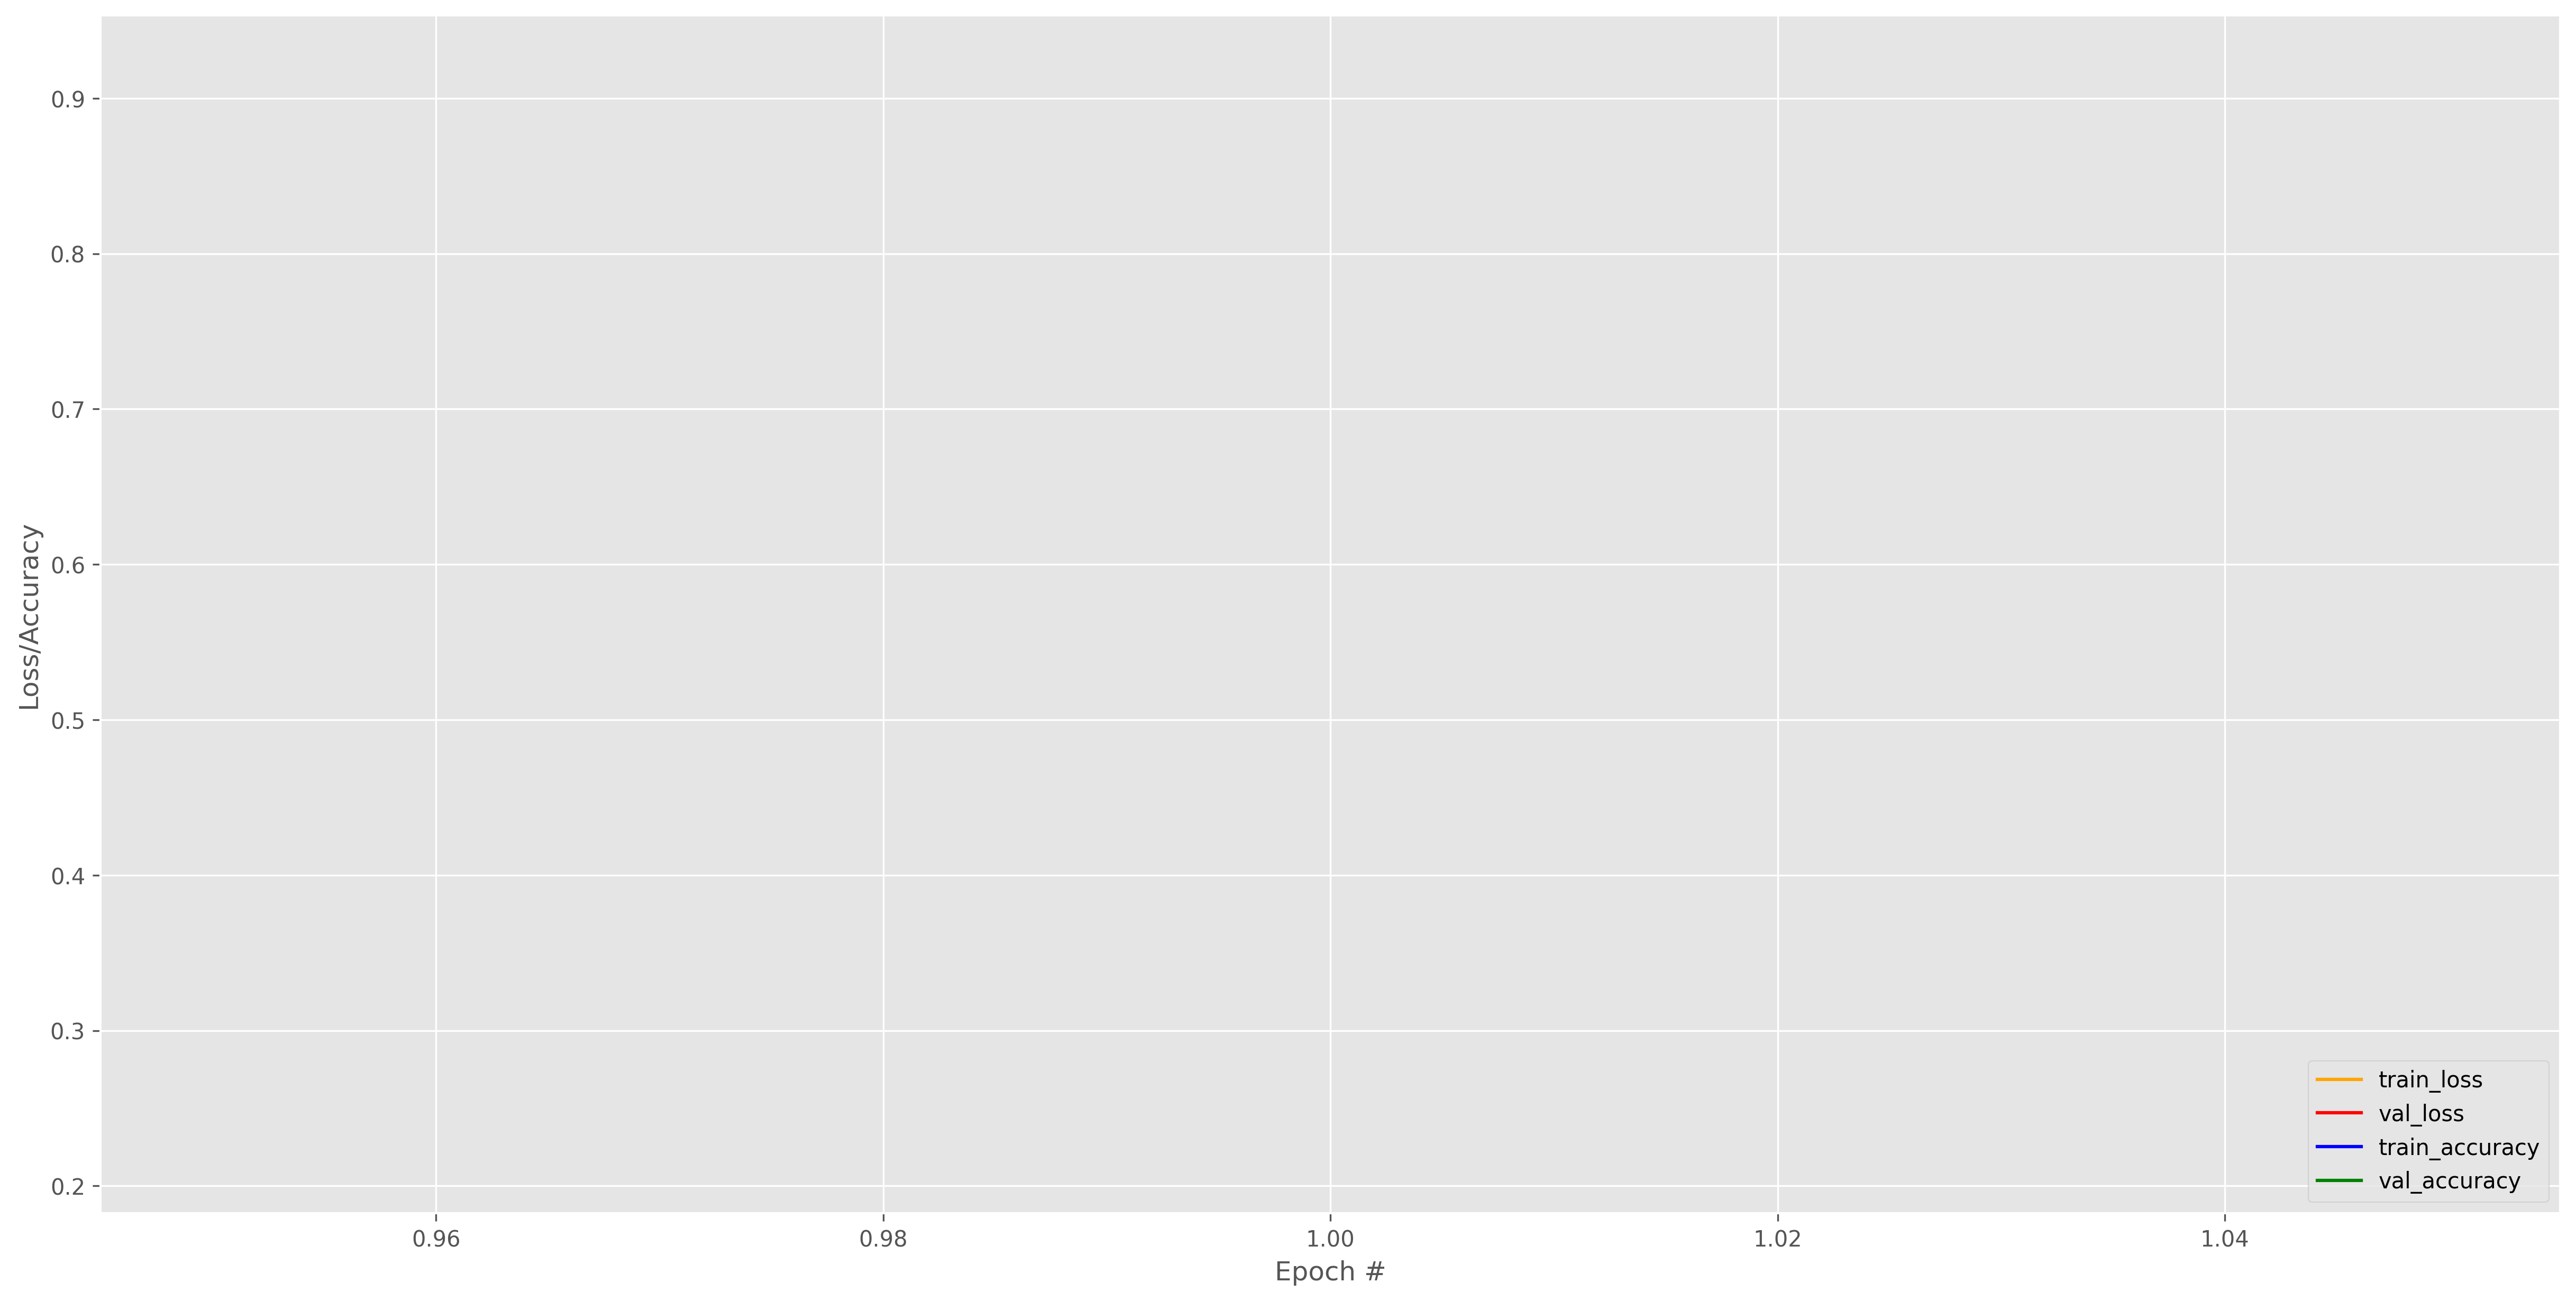

In [63]:
N = epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10), dpi=300)
plt.plot(np.arange(1, N+1), history.history["loss"], 'orange', label="train_loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], 'red', label="val_loss")
plt.plot(np.arange(1, N+1), history.history["accuracy"], 'blue', label="train_accuracy")
plt.plot(np.arange(1, N+1), history.history["val_accuracy"], 'green', label="val_accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right")
plt.savefig("logs/SqueezeNet_custom_plot.png")

In [22]:
#%% compile and train the VGG19 model

adam = Adam(lr=0.0001)
vgg19_custom_model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy']) 
filepath = 'weights/' + vgg19_custom_model.name + '.{epoch:02d}-{val_accuracy:.4f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, 
                             save_weights_only=False, save_best_only=True, mode='max', period=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2,
                              verbose=1, mode='max', min_lr=0.00001)

tensor_board = TensorBoard(log_dir='logs/', histogram_freq=0, batch_size=batch_size)
callbacks_list = [checkpoint, tensor_board, reduce_lr]
history = vgg19_custom_model.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size,
                                  epochs=epochs, validation_data=validation_generator,
                                  class_weight = class_weights,
                                  callbacks=callbacks_list, 
                                  validation_steps=nb_validation_samples // batch_size, verbose=1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
N = epochs
plt.style.use("ggplot")
plt.figure(figsize=(20,10), dpi=300)
plt.plot(np.arange(1, N+1), history.history["loss"], 'orange', label="train_loss")
plt.plot(np.arange(1, N+1), history.history["val_loss"], 'red', label="val_loss")
plt.plot(np.arange(1, N+1), history.history["acc"], 'blue', label="train_acc")
plt.plot(np.arange(1, N+1), history.history["val_acc"], 'green', label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right")
plt.savefig("VGG19_custom_plot.png")

## Results

With the Kaggle-model we already achieved a very high validation accuracy of 95.96%. Nevertheless, we tried to optimize this performance by choosing different hyperparameters and adjusting the model.

For example in the compiling step, we adapted the number of epochs or we have chosen Adam instead of SGD as optimizer and played with the decay of the learning rate. We also tried to add further layers like BatchNormalization, Dense, Dropout, MaxPooling or another Convolutional Layer to the model.

<br>

![image.png](https://raw.githubusercontent.com/ramon-schildknecht/deep_learning_bootcamp/master/pictures/model_comparison_cnn_based_on_dataframe.jpg)

<br>

With three models we achieved a validation accuracy of 96.97% which was slightly higher than the validation accuracy achieved with the Kaggle model. All of these three models were using adam as optimizer and were trained with at least 20 epochs. Training the same model with 40 epochs did not improve the performance. 

Our detailed model comparisons can be found [here](https://drive.google.com/open?id=1z_M7-X5d5myFo7yu5IP3U-zAJmsuWP0C).



## Extension: Convolutional Neural Net with Meta-Species
Our second idea was to make use of the very detailed exploratory data analysis from the beginning. Out of the overal 99 species we could identify 34 meta-species. However, the distribution of these meta-species seems to be unbalanced. Only three meta-species "Quercus", "Acer" and "Alnus" occur frequently in the train dataset (Quercus 38%, Acer 10%, Alnus 5%). All other meta-species occur in less than 5% of the data.

Again we take our network from the beginning with one Convolutional Layer and 512 filters. Instead of 99 species we now only have 34 meta_species as labels (nb_class). Therefore we have to specify the number of neurons in the last dense layer with 34 (the number of meta_species).

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from keras.optimizers import SGD
from keras.utils import np_utils

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# creating column meta_species (total 34 meta_species)
meta_species = train['species'].str.extract(r"([^_]+)")
train.insert(2, "meta_species", meta_species, True)

def encode(train, test):
    label_encoder = LabelEncoder().fit(train.meta_species)
    labels = label_encoder.transform(train.meta_species)
    classes = list(label_encoder.classes_)

    train = train.drop(['species', 'id', 'meta_species'], axis=1)
    test = test.drop('id', axis=1)

    return train, labels, test, classes

train, labels, test, classes = encode(train, test)

# standardize train features
scaler = StandardScaler().fit(train.values)
scaled_train = scaler.transform(train.values)

# split train data into train and validation
sss = StratifiedShuffleSplit(test_size=0.1, random_state=23)
for train_index, valid_index in sss.split(scaled_train, labels):
    X_train, X_valid = scaled_train[train_index], scaled_train[valid_index]
    y_train, y_valid = labels[train_index], labels[valid_index]
    X_df_train, X_df_valid = df_train.loc[df_train.index.isin(train_index)].reindex(train_index), df_train.loc[df_train.index.isin(valid_index)].reindex(train_index)


nb_features = 64 # number of features per features type (shape, texture, margin)   
nb_class = len(classes)

# reshape train data
X_train_r = np.zeros((len(X_train), nb_features, 3))
X_train_r[:, :, 0] = X_train[:, :nb_features]
X_train_r[:, :, 1] = X_train[:, nb_features:128]
X_train_r[:, :, 2] = X_train[:, 128:]

# reshape validation data
X_valid_r = np.zeros((len(X_valid), nb_features, 3))
X_valid_r[:, :, 0] = X_valid[:, :nb_features]
X_valid_r[:, :, 1] = X_valid[:, nb_features:128]
X_valid_r[:, :, 2] = X_valid[:, 128:]

# Keras model with one Convolution1D layer
model_1 = Sequential()
model_1.add(Convolution1D(nb_filter=512, filter_length=1, input_shape=(nb_features, 3)))
model_1.add(Activation('relu'))
model_1.add(Flatten())
model_1.add(Dropout(0.4))
model_1.add(Dense(2048, activation='relu'))
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dense(nb_class))
model_1.add(Activation('softmax'))

y_train = np_utils.to_categorical(y_train, nb_class)
y_valid = np_utils.to_categorical(y_valid, nb_class)

# sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

nb_epoch = 20
model_1.fit(X_train_r, y_train, nb_epoch=nb_epoch, validation_data=(X_valid_r, y_valid), batch_size=32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(input_shape=(64, 3), filters=512, kernel_size=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 891 samples, validate on 99 samples
Epoch 1/20
891/891 [==============================] - 2s 3ms/step - loss: 1.7934 - acc: 0.5701 - val_loss: 0.4576 - val_acc: 0.9495
Epoch 2/20
891/891 [==============================] - 1s 857us/step - loss: 0.3630 - acc: 0.9439 - val_loss: 0.4933 - val_acc: 0.9192
Epoch 3/20
891/891 [==============================] - 1s 860us/step - loss: 0.3756 - acc: 0.9652 - val_loss: 0.5010 - val_acc: 0.9192
Epoch 4/20
891/891 [==============================] - 1s 862us/step - loss: 0.3822 - acc: 0.9618 - val_loss: 0.3920 - val_acc: 0.9596
Epoch 5/20
891/891 [==============================] - 1s 856us/step - loss: 0.3361 - acc: 0.9787 - val_loss: 0.3944 - val_acc: 0.9596
Epoch 6/20
891/891 [==============================] - 1s 863us/step - loss: 0.3343 - acc: 0.9776 - val_loss: 0.3780 - val_acc: 0.9596
Epoch 7/20
891/891 [==============================] - 1s 861us/step - loss: 0.3283 - acc: 0.9798 - val_loss: 0.3548 - val_acc: 0.9697
Epoch 8/20
891/891 

##Conclusions
While using the 34 Meta-Species which could be identified in the exploratory analysis we could achieve a validation accuracy of almost 99%. 

Since the model has already shown a very high performance with 99 species, it is possible that the model will perform even better when reduced to 34 labels (meta-species). 



<br>
<br>

# Prepare Data for usage of Neural Nets based on Images

## Idea

Our next approach is to build a neural net with the leaf images which were provided with the dataset. Unfortunately the images only take the ID in their name and not the species they belong to. Therefore we first need to rename all the images and later separate them into a train and test set. Afterwards we will train a neural net and try to use images as input volume. Our goal is to correctly predict the label of the test images.

## Implementation for Species

In [ ]:
# Imports
import os
import os.path
import csv

Our challenge is that the pictures are not labelled. Therefore we have to extract the information from the .csv and then integrate it into the image_id's. After that we have labels.

In [ ]:
## Will create folder with renamed .jpgs ##
# first create dictionary so we can easily look-up species of each ID
dictionary = dict(zip(df_train['id'], df_train['species']))
#print(dictionary)

# folder structure
directory = 'data/LeafClassification'
new_directory = 'data/New_LeafClassification'
# check if new folder exists, else create one
if not os.path.exists(new_directory):
    os.makedirs(new_directory)
# iterate through all .jpg files in the folder and 
# save the .jpg files in the new folder including
# the new filename
for f in os.listdir(directory):
    filename, file_extension = os.path.splitext(f)
    if isfile(join(directory, f)) and file_extension == ".jpg":
        species = dictionary.get(int(filename))
        # if none save the file
        if species != None:
            Image.open(join(directory, f)).save(join(new_directory, 
                      (species + '-' + filename + '.jpg')),'JPEG')
        #print(filename)
        #print(species)

In [ ]:
## Will create folder with subfolders and renamed .jpgs ##
# first create dictionary so we can easily look-up species of each ID
dictionary = dict(zip(df_train['id'], df_train['species']))

# folder structure
directory = 'data/LeafClassification'
new_directory = 'data/New_LeafClassification2'
# check if new folder exists, else create one
#if not os.path.exists(new_directory):
os.makedirs(new_directory)
# iterate through all .jpg files in the folder and save the .jpg files in the new folder including
# the new filename
for f in os.listdir(directory):
    filename, file_extension = os.path.splitext(f)
    if isfile(join(directory, f)) and file_extension == ".jpg":
        species = dictionary.get(int(filename))
        # if none save the file
        if species != None:
          # here we create a directory for each species
            species_directory = join(new_directory, species)
            print(species_directory)
            #if not os.path.exists(species_directory):
            os.makedirs(species_directory)
            Image.open(join(directory, f)).save(join(species_directory, (species + '-' + filename + '.jpg')),'JPEG')
        #print(filename)
        #print(species)

<br>

## Implementation for Metaspecies

Create one folder per Metaspecies and put all the relevant into the folders.

In [ ]:
### Metaspecies ###
## Will create folder with renamed .jpgs ##
# first create dictionary so we can easily look-up species of each ID
dictionary = dict(zip(df_train['id'], df_train['meta_species']))
#print(dictionary)

# folder structure
directory = 'data/LeafClassification'
new_directory = 'data/New_LeafClassification_meta_species'
# check if new folder exists, else create one
if not os.path.exists(new_directory):
    os.makedirs(new_directory)
# iterate through all .jpg files in the folder and 
# save the .jpg files in the new folder including
# the new filename
for f in os.listdir(directory):
    filename, file_extension = os.path.splitext(f)
    if isfile(join(directory, f)) and file_extension == ".jpg":
        species = dictionary.get(int(filename))
        # if none save the file
        if species != None:
            Image.open(join(directory, f)).save(join(new_directory, 
                      (species + '-' + filename + '.jpg')),'JPEG')

In [ ]:
## Will create folder with subfolders and renamed .jpgs ##
# first create dictionary so we can easily look-up species of each ID
dictionary = dict(zip(df_train['id'], df_train['meta_species']))

# folder structure
directory = 'data/New_LeafClassification_meta_species'
new_directory = 'data/New_LeafClassification_meta_species_final'
# check if new folder exists, else create one
#if not os.path.exists(new_directory):
os.makedirs(new_directory)
# iterate through all .jpg files in the folder and save the .jpg 
# files in the new folder including the new filename
for f in os.listdir(directory):
    filename, file_extension = os.path.splitext(f)
    meta_species, filename = filename.split("-")
    if isfile(join(directory, f)) and file_extension == ".jpg":
      if meta_species != None:
        meta_species_directory = join(new_directory, meta_species)
        os.makedirs(meta_species_directory, exist_ok=True)
        Image.open(join(directory, f)).save(join(meta_species_directory, (meta_species + '-' + filename + '.jpg')),'JPEG')


<br>

## Create Training, Validation and Test Folders

In [ ]:
# install if package is not available: 
!pip install split-folders
# use progress bar: 
!pip install split-folders tqdm

# many thanks to the amazing guys from jfilter for this great package: https://github.com/jfilter/split-folders
import split_folders

# Split with a ratio of train (60%), validiation (20%) and test (20%)
split_folders.ratio('data/New_LeafClassification2', output="data/model_input_species", seed=2222020, ratio=(.6, .2, .2)) 

In [ ]:
# rename folders to default names regarding reading the data for the models
import os
from pathlib import Path

print_message = "folder has already the correct name"

if Path("data/model_input_species/training_data").is_dir():
  print(print_message)
else:
  os.rename("data/model_input_species/train", "data/model_input_species/training_data")


if Path("data/model_input_species/validation_data").is_dir():
  print(print_message)
else:
  os.rename("data/model_input_species/val", "data/model_input_species/validation_data")

if Path("data/model_input_species/test_data").is_dir():
  print(print_message)
else:
  os.rename("data/model_input_species/test", "data/model_input_species/test_data")

In [ ]:
import split_folders

# Split with a ratio of train (60%), validiation (20%) and test (20%)
split_folders.ratio('data/New_LeafClassification_meta_species_final', output="data/model_input_meta_species", seed=2222020, ratio=(.6, .2, .2)) 

In [ ]:
# rename folders to default names regarding reading the data for the models
import os
from pathlib import Path

print_message = "folder has already the correct name"

if Path("data/model_input_meta_species/training_data").is_dir():
  print(print_message)
else:
  os.rename("data/model_input_meta_species/train", "data/model_input_meta_species/training_data")


if Path("data/model_input_meta_species/validation_data").is_dir():
  print(print_message)
else:
  os.rename("data/model_input_meta_species/val", "data/model_input_meta_species/validation_data")

if Path("data/model_input_meta_species/test_data").is_dir():
  print(print_message)
else:
  os.rename("data/model_input_meta_species/test", "data/model_input_meta_species/test_data")

<br>
<br>

# CNN based on Pictures with VGG16


In this notebook chapter, we'll build, train and optimize a neural network to classify images of the species dataset using convolutional neural networks on pictures for species as well as metaspecies.

## Species MVP example
It is a good idea to start with a small data sample to test if the model is running as expected. That is why we start with just two species containing a total of 12 train and 4 validation pictures.

In [ ]:
# General imports
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard 

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    
# The target image size can be fixed here (quadratic)
# The ImageDataGenerator() automatically scales the images accordingly (aspect ratio is changed)
image_size = 150

In [ ]:
vgg16 = applications.VGG16(include_top=False, weights='imagenet',
                           input_shape=(image_size,image_size,3))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications

vgg16 = applications.VGG16(include_top=False, weights='imagenet',
                           input_shape=(image_size,image_size,3))

model_freeze_conv = models.Sequential()
model_freeze_conv.add(vgg16)
model_freeze_conv.add(layers.Flatten())
model_freeze_conv.add(layers.Dense(256, activation = 'relu'))
model_freeze_conv.add(layers.Dense(2, activation = 'softmax'))

In [ ]:
model_freeze_conv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 16,812,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights'
     ' before freezing the conv base:', len(model_freeze_conv.trainable_weights))

vgg16.trainable = False

print('This is the number of trainable weights'
     ' after freezing the conv base:', len(model_freeze_conv.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
image_size = 150
batch_size = 4
# batch_size = 64
num_train_images = 12
num_valid_images = 4
num_classes = 2

class_names = ['Acer_Capillipes', 'Acer_Circinatum']


# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/_cnn_mvp/training_data',
        target_size=(image_size, image_size),
        classes=class_names,
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        'data/_cnn_mvp/validation_data',
        target_size=(image_size, image_size),
        classes=class_names,
        batch_size=batch_size)

model_freeze_conv.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_freeze_conv.summary()

Found 12 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 16,812,610
Trainable params: 2,097,922
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
epochs = 20

history=model_freeze_conv.fit_generator(
        train_generator,
        steps_per_epoch=num_train_images // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=num_valid_images // batch_size)

model_freeze_conv.save_weights('models/mvp_model_vgg16.h5')

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 1.1632 - acc: 0.5000 - val_loss: 0.0016 - val_acc: 1.0000
Epoch 2/20
3/3 [==============================] - 0s 48ms/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0856 - val_acc: 1.0000
Epoch 3/20
3/3 [==============================] - 0s 48ms/step - loss: 0.0371 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 60ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 3.3433e-04 - val_acc: 1.0000
Epoch 5/20
3/3 [==============================] - 0s 62ms/step - loss: 1.1777e-04 - acc: 1.0000 - val_loss: 1.7315e-05 - val_acc: 1.0000
Epoch 6/20
3/3 [==============================] - 0s 48ms/step - loss: 9.5917e-05 - acc: 1.0000 - val_loss: 1.0729e-06 - val_acc: 1.0000
Epoch 7/20
3/3 [==============================] - 0s 51ms/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/20
3/3 [==============================] - 0s 49ms/step - loss: 

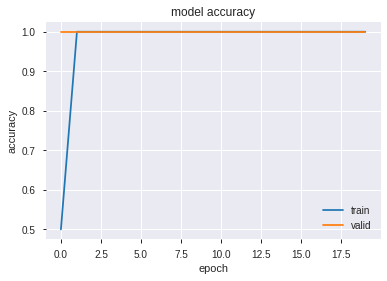

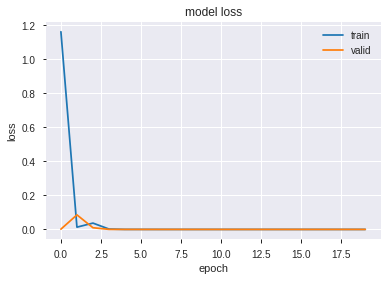

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
validation_generator_no_shuffle = validation_datagen.flow_from_directory(
        'data/_cnn_mvp/validation_data',
        target_size=(image_size, image_size),
        batch_size=num_valid_images,
        classes=class_names,
        shuffle=False)


prediction = model_freeze_conv.predict_generator(validation_generator_no_shuffle,1)

Found 4 images belonging to 2 classes.


In [ ]:
Y_valid = np.zeros((num_valid_images,1),dtype=int)

step = num_valid_images // num_classes
for ind in range(num_classes):
    Y_valid[ind*step:(ind+1)*step] = ind
    
confmat = confusion_matrix(Y_valid,np.argmax(prediction,axis=1))   

for i0 in range(num_classes):
    sys.stdout.write('[')
    for i1 in range(num_classes):
        sys.stdout.write('{:3d} '.format(confmat[i0,i1]))
    
    sys.stdout.write('], {}\n'.format(class_names[i0]))
    
sys.stdout.flush()

[  2   0 ], Acer_Capillipes
[  0   2 ], Acer_Circinatum


The MVP was quite a success with a validation accuracy of 100%. Now we continue using the whole dataset.

<br>
<br>

## Implementation for entire Species Dataset

In [ ]:
# General imports
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard 

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    
# The target image size can be fixed here (quadratic)
# The ImageDataGenerator() automatically scales the images accordingly (aspect ratio is changed)
image_size = 150

In [ ]:
# get number of classes
species_class_names = df_train["species"].unique().tolist()
print(species_class_names[:5])
len(species_class_names)

['Acer_Opalus', 'Pterocarya_Stenoptera', 'Quercus_Hartwissiana', 'Tilia_Tomentosa', 'Quercus_Variabilis']


99

In [ ]:
random.seed(69)
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications

num_classes = len(species_class_names)

vgg16 = applications.VGG16(include_top=False, weights='imagenet',
                           input_shape=(image_size,image_size,3))

model_freeze_conv = models.Sequential()
model_freeze_conv.add(vgg16)
model_freeze_conv.add(layers.Flatten())
model_freeze_conv.add(layers.Dense(256, activation = 'relu'))
model_freeze_conv.add(layers.Dense(num_classes, activation = 'softmax'))

In [ ]:
model_freeze_conv.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 99)                25443     
Total params: 16,837,539
Trainable params: 16,837,539
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights'
     ' before freezing the conv base:', len(model_freeze_conv.trainable_weights))

vgg16.trainable = False

print('This is the number of trainable weights'
     ' after freezing the conv base:', len(model_freeze_conv.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
random.seed(69)
batch_size = 32
num_train_images = 594
num_valid_images = 198
class_names = species_class_names


# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/model_input_species/training_data',
        target_size=(image_size, image_size),
        classes=class_names,
        batch_size=batch_size,
        color_mode='rgb')

validation_generator = validation_datagen.flow_from_directory(
        'data/model_input_species/validation_data',
        target_size=(image_size, image_size),
        classes=class_names,
        batch_size=batch_size,
        color_mode='rgb')

model_freeze_conv.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_freeze_conv.summary()

Found 594 images belonging to 99 classes.
Found 198 images belonging to 99 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 99)                25443     
Total params: 16,837,539
Trainable params: 2,122,851
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
random.seed(69)
epochs = 20

history=model_freeze_conv.fit_generator(
        train_generator,
        steps_per_epoch=num_train_images // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=num_valid_images // batch_size)

model_freeze_conv.save_weights('models/species_cnn_model_vgg16_frozen_layers.h5')

Epoch 1/20
18/18 [==============================] - 284s 16s/step - loss: 4.6107 - acc: 0.0712 - val_loss: 3.8364 - val_acc: 0.1927
Epoch 2/20
18/18 [==============================] - 5s 256ms/step - loss: 3.5071 - acc: 0.2189 - val_loss: 2.8668 - val_acc: 0.3438
Epoch 3/20
18/18 [==============================] - 4s 239ms/step - loss: 2.6472 - acc: 0.3772 - val_loss: 2.1822 - val_acc: 0.4583
Epoch 4/20
18/18 [==============================] - 4s 237ms/step - loss: 2.0920 - acc: 0.4609 - val_loss: 1.8625 - val_acc: 0.4948
Epoch 5/20
18/18 [==============================] - 4s 238ms/step - loss: 1.6317 - acc: 0.5854 - val_loss: 1.5438 - val_acc: 0.5677
Epoch 6/20
18/18 [==============================] - 4s 229ms/step - loss: 1.3771 - acc: 0.6441 - val_loss: 1.3618 - val_acc: 0.6250
Epoch 7/20
18/18 [==============================] - 4s 231ms/step - loss: 1.1722 - acc: 0.6975 - val_loss: 1.1660 - val_acc: 0.6719
Epoch 8/20
18/18 [==============================] - 4s 236ms/step - loss: 1.

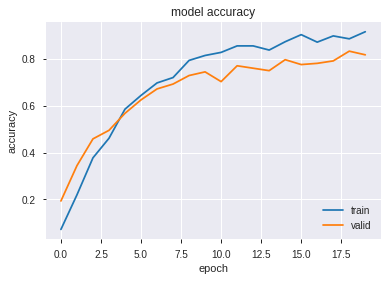

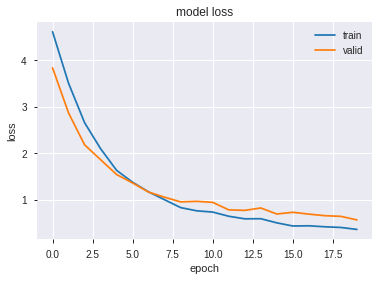

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
random.seed(69)
# prepare confusion matrix
validation_generator_no_shuffle = validation_datagen.flow_from_directory(
        'data/model_input_species/validation_data',
        target_size=(image_size, image_size),
        batch_size=num_valid_images,
        classes=class_names,
        shuffle=False)


prediction = model_freeze_conv.predict_generator(validation_generator_no_shuffle,1)

Found 198 images belonging to 99 classes.


In [ ]:
# show confusion matrix
Y_valid = np.zeros((num_valid_images,1),dtype=int)

step = num_valid_images // num_classes
for ind in range(num_classes):
    Y_valid[ind*step:(ind+1)*step] = ind
    
confmat = confusion_matrix(Y_valid,np.argmax(prediction,axis=1))   

for i0 in range(num_classes):
    sys.stdout.write('[')
    for i1 in range(num_classes):
        sys.stdout.write('{:3d} '.format(confmat[i0,i1]))
    
    sys.stdout.write('], {}\n'.format(class_names[i0]))
    
sys.stdout.flush()

[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 ], Acer_Opalus
[  0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 ], Pterocarya_Stenoptera
[  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

<br>
<br>

## Implementation for entire Metaspecies Dataset

In [ ]:
# General imports
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard 

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    
# The target image size can be fixed here (quadratic)
# The ImageDataGenerator() automatically scales the images accordingly (aspect ratio is changed)
image_size = 150

In [ ]:
# get number of classes
species_class_names = df_train["meta_species"].unique().tolist()
print(species_class_names[:5])
len(species_class_names)

['Acer', 'Pterocarya', 'Quercus', 'Tilia', 'Magnolia']


34

In [ ]:
random.seed(69)
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications

num_classes = len(species_class_names)

vgg16 = applications.VGG16(include_top=False, weights='imagenet',
                           input_shape=(image_size,image_size,3))

model_freeze_conv = models.Sequential()
model_freeze_conv.add(vgg16)
model_freeze_conv.add(layers.Flatten())
model_freeze_conv.add(layers.Dense(256, activation = 'relu'))
model_freeze_conv.add(layers.Dense(num_classes, activation = 'softmax'))

In [ ]:
model_freeze_conv.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 34)                8738      
Total params: 16,820,834
Trainable params: 16,820,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print('This is the number of trainable weights'
     ' before freezing the conv base:', len(model_freeze_conv.trainable_weights))

vgg16.trainable = False

print('This is the number of trainable weights'
     ' after freezing the conv base:', len(model_freeze_conv.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [ ]:
random.seed(69)
batch_size = 32
num_train_images = 594
num_valid_images = 198
class_names = species_class_names


# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/model_input_meta_species/training_data',
        # 'data/model_input_species/training_data',
        target_size=(image_size, image_size),
        classes=class_names,
        batch_size=batch_size,
        color_mode='rgb')

validation_generator = validation_datagen.flow_from_directory(
        'data/model_input_meta_species/validation_data',
        # 'data/model_input_species/validation_data',
        target_size=(image_size, image_size),
        classes=class_names,
        batch_size=batch_size,
        color_mode='rgb')

model_freeze_conv.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_freeze_conv.summary()

Found 594 images belonging to 34 classes.
Found 198 images belonging to 34 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 34)                8738      
Total params: 16,820,834
Trainable params: 2,106,146
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
random.seed(69)
epochs = 50

history=model_freeze_conv.fit_generator(
        train_generator,
        steps_per_epoch=num_train_images // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=num_valid_images // batch_size)
        # , callbacks=[tensorboard_2])

model_freeze_conv.save_weights('models/meta_species_cnn_model_vgg16_frozen_layers.h5')

Epoch 1/50
18/18 [==============================] - 283s 16s/step - loss: 2.9676 - acc: 0.3399 - val_loss: 1.8579 - val_acc: 0.5000
Epoch 2/50
18/18 [==============================] - 5s 273ms/step - loss: 1.7174 - acc: 0.5374 - val_loss: 1.4347 - val_acc: 0.6094
Epoch 3/50
18/18 [==============================] - 5s 253ms/step - loss: 1.2752 - acc: 0.6281 - val_loss: 1.1321 - val_acc: 0.6875
Epoch 4/50
18/18 [==============================] - 5s 252ms/step - loss: 1.0715 - acc: 0.6886 - val_loss: 0.9483 - val_acc: 0.7292
Epoch 5/50
18/18 [==============================] - 4s 242ms/step - loss: 0.9437 - acc: 0.7402 - val_loss: 0.8353 - val_acc: 0.7396
Epoch 6/50
18/18 [==============================] - 4s 241ms/step - loss: 0.7430 - acc: 0.7829 - val_loss: 0.6385 - val_acc: 0.8281
Epoch 7/50
18/18 [==============================] - 4s 238ms/step - loss: 0.6558 - acc: 0.8096 - val_loss: 0.6576 - val_acc: 0.7448
Epoch 8/50
18/18 [==============================] - 5s 260ms/step - loss: 0.

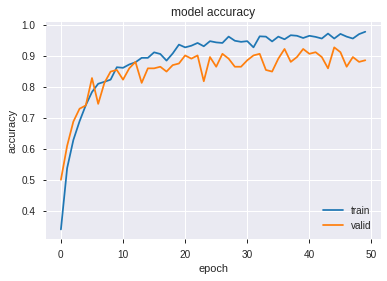

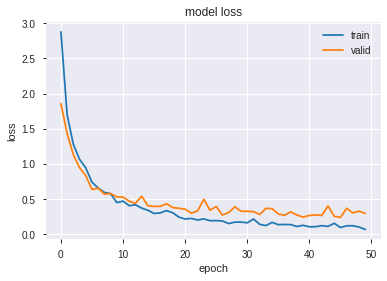

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
random.seed(69)
# prepare confusion matrix
validation_generator_no_shuffle = validation_datagen.flow_from_directory(
        'data/model_input_meta_species/validation_data',
        target_size=(image_size, image_size),
        batch_size=num_valid_images,
        classes=class_names,
        shuffle=False)


prediction = model_freeze_conv.predict_generator(validation_generator_no_shuffle,1)

Found 198 images belonging to 34 classes.


In [ ]:
# show confusion matrix
Y_valid = np.zeros((num_valid_images,1),dtype=int)

step = num_valid_images // num_classes
for ind in range(num_classes):
    Y_valid[ind*step:(ind+1)*step] = ind
    
confmat = confusion_matrix(Y_valid,np.argmax(prediction,axis=1))   

for i0 in range(num_classes):
    sys.stdout.write('[')
    for i1 in range(num_classes):
        sys.stdout.write('{:3d} '.format(confmat[i0,i1]))
    
    sys.stdout.write('], {}\n'.format(class_names[i0]))
    
sys.stdout.flush()

[  5   0   6   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   4   2   2   4   1   2   2   0   1   2   1 ], Acer
[  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 ], Pterocarya
[  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 ], Quercus
[  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 ], Tilia
[  0   2   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 ], Magnolia
[  0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 ], Salix
[  0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

## Results

The validation accuracy for the species was 76.56% and the one for metaspecies was 88.54%. We see that the model works much more accurately for more pictures within each label. <br> 
We generally received quite good learning curves for both models. We played with the hyperparameters of both models (species and metaspecies). The batch size of 32 seems to be the best trade-off regarding the calculation speed and accuracy. The number of epochs set to 20 seems to reveal optimal results. Increasing this number up to 100 epochs does not provide any meaningful improvement. It even showed overfitting for higher numbers. 

## Conclusion

The CNNs based only on the tabular data has a much higher accuracy than the one based only on the tabular data. We could improve the model with data augmentation because we just have very little data to learn from (6 training and 2 validation per species in this case). Because of time limiting reasons we decided not to do so. <br>


<br>
<br>

# Multi-Input Architecture

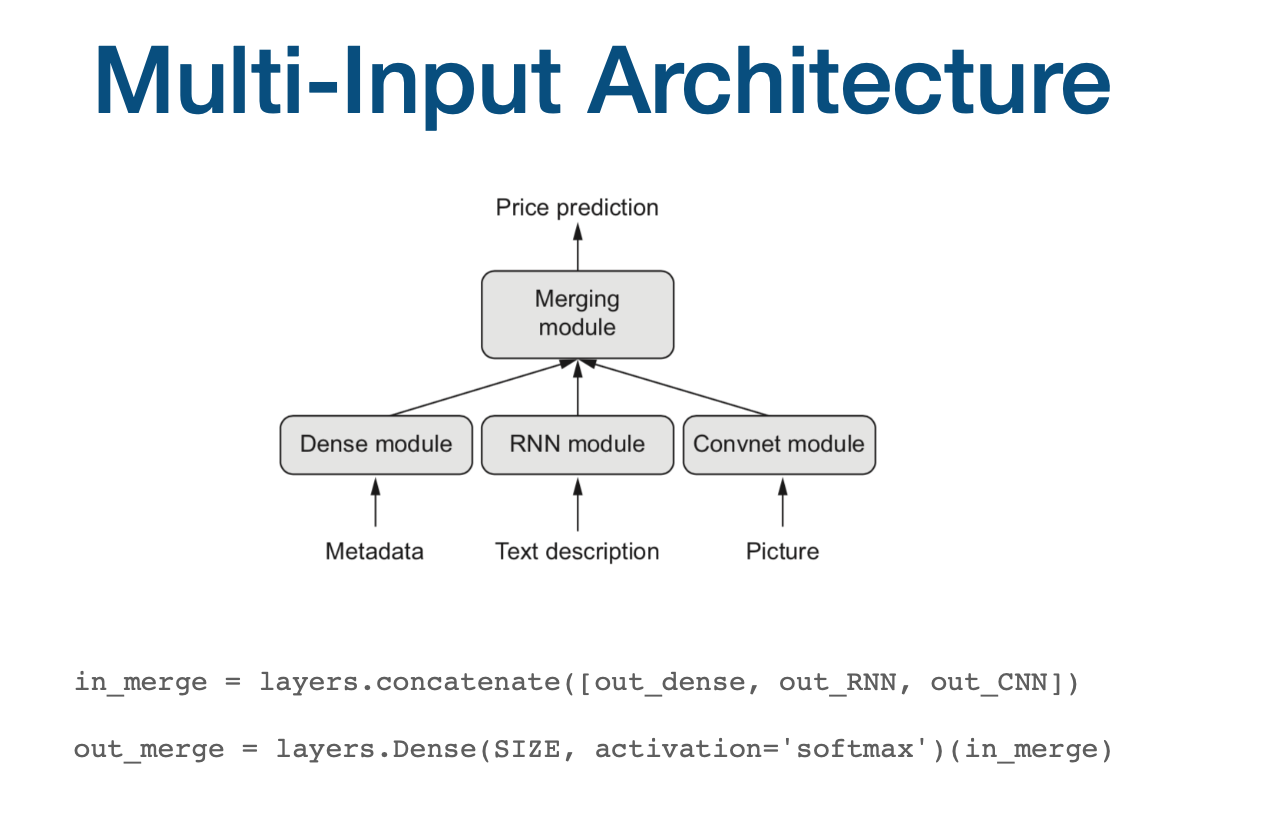

In [ ]:
Image(filename='/content/drive/My Drive/IDS_DLB_Deep_Learning_Bootcamp/Data Challenge/pictures/1.png', width=900, height=400)

## Idea

The main idea here is to combine the features data with the image data. We can reuse the model CNN with Species trained on the feature data and the VGG16 trained on the image data. Combining these two models into a larger Neural Network would allow us in theory to create a robust model, that would learn from different elements to distinguish between the species.

## Implementation

In [ ]:
from tensorflow.keras.layers import Conv1D

# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import applications

# General imports
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, concatenate
from tensorflow.keras.callbacks import TensorBoard 

from keras.utils import np_utils

import cv2

In [ ]:
## Preprocessing
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

def encode(train, test):
    label_encoder = LabelEncoder().fit(train.species)
    labels = label_encoder.transform(train.species)
    classes = list(label_encoder.classes_)
    name_mapping = dict(zip(label_encoder.transform(label_encoder.classes_),label_encoder.classes_))

    train = train.drop(['species', 'id', 'meta_species'], axis=1)
    test = test.drop('id', axis=1)
    
    return train, labels, test, classes, name_mapping

train, labels, test, classes, name_mapping = encode(df_train, df_test)

### How the labels relate to the train data ###
# The first element of train belongs to the first element of labels, which is encoded as 3.
# Looking up 3 in the name_mapping gives us the result Acer_Opalus.
# This is correct and relates to id 1 which is of the species Acer_Opalus.

# standardize train features
scaler = StandardScaler().fit(train.values)
scaled_train = scaler.transform(train.values)

# split train data into train and validation
sss = StratifiedShuffleSplit(test_size=0.2, random_state=69)
for train_index, valid_index in sss.split(scaled_train, labels):
    X_train, X_valid = scaled_train[train_index], scaled_train[valid_index]
    y_train, y_valid = labels[train_index], labels[valid_index]
    X_df_train, X_df_valid = df_train.loc[df_train.index.isin(train_index)].reindex(train_index), df_train.loc[df_train.index.isin(valid_index)].reindex(valid_index)


nb_features = 64 # number of features per features type (shape, texture, margin)   
nb_class = len(classes)

# reshape train data
X_train_r = np.zeros((len(X_train), nb_features, 3))
X_train_r[:, :, 0] = X_train[:, :nb_features]
X_train_r[:, :, 1] = X_train[:, nb_features:128]
X_train_r[:, :, 2] = X_train[:, 128:]

# reshape validation data
X_valid_r = np.zeros((len(X_valid), nb_features, 3))
X_valid_r[:, :, 0] = X_valid[:, :nb_features]
X_valid_r[:, :, 1] = X_valid[:, nb_features:128]
X_valid_r[:, :, 2] = X_valid[:, 128:]

y_train = np_utils.to_categorical(y_train, nb_class)
y_valid = np_utils.to_categorical(y_valid, nb_class)

In [ ]:
## Model 1: Convolutional Neural Net with Species

nb_features = 64 # number of features per features type (shape, texture, margin)   
nb_class = len(classes)

# Keras model with one Convolution1D layer
feat_model = models.Sequential()
feat_model.add(Conv1D(filters=512, kernel_size= (1), input_shape =(nb_features, 3)))
#feat_model.add(Convolution1D(nb_filter=512, filter_length=1, input_shape=(nb_features, 3)))
feat_model.add(Activation('relu'))
feat_model.add(Flatten())
feat_model.add(Dropout(0.4))
feat_model.add(Dense(2048, activation='relu'))
feat_model.add(Dense(1024, activation='relu'))
feat_model.add(Dense(nb_class, activation='relu'))

In [ ]:
## Model 2: VGG16 with frozen layers
image_size = 150
batch_size = 32
num_train_images = 576
num_valid_images = 192

# get number of classes
species_class_names = df_train["species"].unique().tolist()
num_classes = len(species_class_names)
class_names = species_class_names

vgg16 = applications.VGG16(include_top=False, weights='imagenet',
                           input_shape=(image_size,image_size,3))

img_model = models.Sequential()
img_model.add(vgg16)
img_model.add(layers.Flatten())
img_model.add(layers.Dense(256, activation = 'relu'))
img_model.add(layers.Dense(num_classes, activation = 'relu'))
vgg16.trainable = False

In [ ]:
## Combine the two models i.e. the CNN attributes and VGG16 images model

# Concatenate
concat = tf.keras.layers.Concatenate()([img_model.output, feat_model.output])

# output layer
output = tf.keras.layers.Dense(units=nb_class,
                               activation=tf.keras.activations.softmax)(concat)

combined_model = tf.keras.Model(inputs=[img_model.input, feat_model.input], outputs=[output])

combined_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
combined_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv1d_input (InputLayer)       [(None, 64, 3)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 64, 512)      2048        conv1d_input[0][0]               
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 512)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
vgg16_input (InputLayer)        [(None, 150, 150, 3) 0                                            
______________________________________________________________________________________________

In [ ]:
## Part of the Preprocessing to Vectorise the image
def get_img_np(df, path):
  images = []
  for id in df['id']:
      #print(id)
      outputImage = np.zeros((150, 150, 3), dtype="uint8")
      basePath = os.path.sep.join([path, f"{id}.jpg"])
      image = cv2.imread(basePath)
      image = cv2.resize(image, (150, 150))
      outputImage[0:150, 0:150] = image
      images.append(outputImage)  
  return images

img_train = get_img_np(X_df_train, 'data/LeafClassification')
img_valid = get_img_np(X_df_valid, 'data/LeafClassification')

In [ ]:
## Train the model
combined_model_fit = combined_model.fit(
	[img_train, X_train_r], y_train,
	validation_data=([img_valid, X_valid_r], y_valid),
	epochs=20, batch_size=32)

Train on 792 samples, validate on 198 samples
Epoch 1/20
792/792 [==============================] - 3s 4ms/sample - loss: 5.3113 - acc: 0.1490 - val_loss: 2.4143 - val_acc: 0.4242
Epoch 2/20
792/792 [==============================] - 2s 2ms/sample - loss: 1.3255 - acc: 0.6591 - val_loss: 0.6673 - val_acc: 0.8131
Epoch 3/20
792/792 [==============================] - 2s 2ms/sample - loss: 0.2081 - acc: 0.9432 - val_loss: 0.4395 - val_acc: 0.8687
Epoch 4/20
792/792 [==============================] - 2s 2ms/sample - loss: 0.0785 - acc: 0.9710 - val_loss: 0.3099 - val_acc: 0.9242
Epoch 5/20
792/792 [==============================] - 2s 2ms/sample - loss: 0.0497 - acc: 0.9886 - val_loss: 0.2123 - val_acc: 0.9444
Epoch 6/20
792/792 [==============================] - 2s 2ms/sample - loss: 0.0198 - acc: 0.9899 - val_loss: 0.1501 - val_acc: 0.9697
Epoch 7/20
792/792 [==============================] - 2s 2ms/sample - loss: 0.0122 - acc: 0.9975 - val_loss: 0.1032 - val_acc: 0.9798
Epoch 8/20
792/7

In [ ]:
combined_model.save_weights('models/combined_model.h5')

In [ ]:
combined_model

## Results

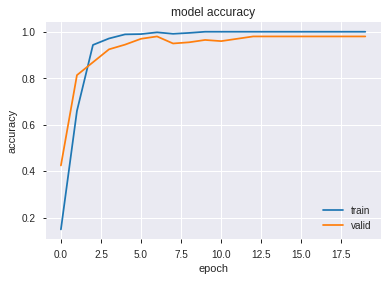

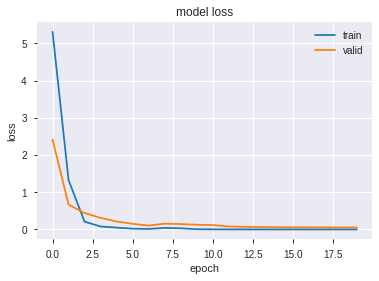

In [ ]:
plt.plot(combined_model_fit.history['acc'])
plt.plot(combined_model_fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.show()
plt.plot(combined_model_fit.history['loss'])
plt.plot(combined_model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [ ]:
# standardize test features
scaler = StandardScaler().fit(test.values)
X_test = scaler.transform(test.values)

nb_features = 64 # number of features per features type (shape, texture, margin)   
nb_class = len(classes)

# reshape train data
X_test_r = np.zeros((len(X_test), nb_features, 3))
X_test_r[:, :, 0] = X_test[:, :nb_features]
X_test_r[:, :, 1] = X_test[:, nb_features:128]
X_test_r[:, :, 2] = X_test[:, 128:]

In [ ]:
img_test = get_img_np(df_test, 'data/LeafClassification')

In [ ]:
predictions = combined_model.predict([img_test, X_test_r])

In [ ]:
df_test

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,...,0.014648,0.017578,0.000977,0.002930,0.034180,0.010742

In [ ]:
predictions

array([[1.9092073e-11, 1.5258675e-15, 8.7718481e-09, ..., 6.5896366e-10,
        2.3840788e-10, 1.5851094e-10],
       [2.8762279e-05, 1.0087984e-14, 3.5753337e-07, ..., 2.5987700e-07,
        2.0320651e-10, 1.2774112e-08],
       [1.0553473e-12, 9.9998963e-01, 6.4525344e-14, ..., 1.5796784e-11,
        5.4174482e-13, 1.4001904e-11],
       ...,
       [4.6125339e-12, 1.0972223e-24, 4.3411174e-11, ..., 3.0026268e-14,
        5.2791747e-16, 2.7943474e-12],
       [6.5452252e-15, 6.3150931e-15, 9.7787133e-11, ..., 3.0717096e-10,
        5.3999230e-07, 5.3095766e-13],
       [1.0367699e-15, 5.3222936e-14, 4.5371275e-13, ..., 2.8248483e-18,
        9.5091510e-15, 6.8938001e-11]], dtype=float32)

In [ ]:
predictions.shape

(594, 99)

In [ ]:
df_submission = pd.read_csv("data/sample_submission.csv")
column_names = df_submission.columns
column_names = column_names.drop('id')

In [ ]:
len(column_names)

99

In [ ]:
final_submission = pd.DataFrame(data = predictions[0:,0:],   # values
                                index = df_test['id'],    # 1st column as index
                                columns = column_names)  # 1st row as the column names
final_submission

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,...,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,1.909207e-11,1.525867e-15,8.771848e-09,1.192644e-10,1.567662e-09,2.003707e-12,5.576161e-13,2.266416e-09,3.477116e-07,7.036575e-08,2.927526e-14,2.602186e-11,2.811313e-10,3.506381e-12,2.545154e-06,2.534019e-12,9.830597e-10,2.216228e-11,2.149244e-13,6.084025e-13,4.548140e-08,3.905124e-10,1.192277e-10,8.658202e-09,7.315010e-12,5.890446e-12,1.946206e-07,8.266297e-10,3.184840e-09,5.119102e-13,1.388186e-09,6.555129e-07,1.669866e-10,6.252297e-10,1.486572e-10,2.385010e-11,7.238842e-11,2.854392e-10,4.304497e-09,3.362351e-11,...,9.639854e-09,2.949077e-09,5.388743e-08,2.160428e-09,5.232443e-11,5.713499e-04,1.256823e-08,2.794441e-10,7.134618e-13,4.869157e-09,5.904045e-12,1.406105e-08,2.493196e-09,2.302374e-10,6.426993e-09,1.062117e-07,1.564821e-09,2.749483e-12,2.677823e-11,4.934270e-14,1.123147e-11,2.565313e-08,1.037162e-10,3.911306e-09,1.948230e-07,7.662502e-07,6.341324e-11,3.026999e-08,2.424787e-11,1.819930e-04,2.373447e-11,6.154536e-12,8.095592e-11,4.471640e-10,2.751614e-11,2.672239e-09,5.571149e-11,6.589637e-10,2.384079e-10,1.585109e-10
7,2.876228e-05,1.008798e-14,3.575334e-07,4.006428e-06,1.525523e-08,1.087892e-10,4.614231e-11,1.054089e-10,1.260839e-09,9.655905e-11,1.462010e-09,4.782185e-13,2.529269e-10,1.208090e-11,7.060615e-10,2.934320e-12,1.336106e-11,6.924979e-09,1.248869e-10,2.324409e-09,3.060897e-12,2.786017e-12,9.887957e-12,7.166953e-09,2.136224e-11,2.786297e-09,4.464965e-10,6.963990e-12,1.694502e-11,1.650668e-14,1.606876e-11,2.822886e-13,1.263981e-10,1.354710e-12,6.853222e-09,2.777345e-10,8.919498e-10,9.015519e-10,2.153210e-10,4.042462e-10,...,3.089125e-09,1.215732e-04,1.849220e-04,7.234956e-12,9.420274e-14,1.623221e-05,4.762829e-05,1.332706e-11,4.760303e-11,8.536648e-07,8.153490e-07,1.678475e-08,1.448291e-07,2.383584e-08,8.481409e-09,5.274122e-11,1.009322e-14,2.156331e-08,2.379944e-13,1.200750e-14,5.975033e-10,5.701561e-09,3.435579e-07,5.414110e-06,4.519768e-10,7.686405e-10,5.667675e-10,4.394349e-05,2.888803e-06,9.123110e-11,4.556529e-10,5.787891e-09,2.290009e-06,9.642690e-11,7.176257e-12,7.892766e-09,2.101563e-06,2.598770e-07,2.032065e-10,1.277411e-08
9,1.055347e-12,9.999896e-01,6.452534e-14,4.344549e-13,8.747911e-11,2.565667e-14,1.473768e-11,3.027402e-08,3.553569e-16,4.039904e-10,3.921358e-13,2.503955e-10,1.295823e-06,6.531354e-16,1.613610e-13,1.524608e-18,8.483598e-12,5.284396e-14,9.226797e-11,4.173907e-16,3.553053e-09,2.960073e-11,8.537428e-15,7.991148e-18,7.867569e-11,4.327184e-23,3.184144e-11,1.306007e-19,1.602914e-12,1.027701e-11,2.807416e

In [ ]:
final_submission.to_csv("data/combined_submission.csv")

Unfortunately the Image Generator could not be easily implemented in the combined model. This results in a relatively small training dataset. This is probably why the model can not exceed in the validation accuracy and overfitts slightly.

# AutoKeras
AutoKeras is an AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University. AutoKeras tries to make machine learning accessible for everyone.

Source: https://autokeras.com/tutorial/customized/

The following image illustrates how we can build the neural network using the building blocks in AutoKeras.

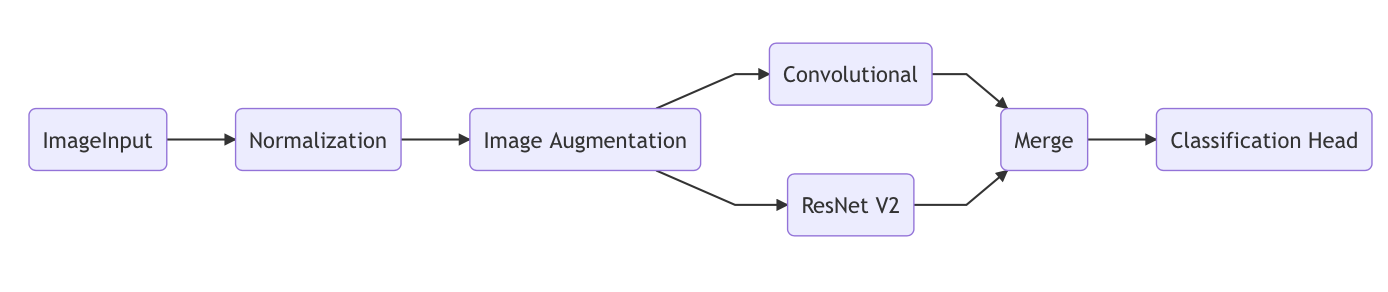

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/My Drive/IDS_DLB_Deep_Learning_Bootcamp/Data Challenge/pictures/2.png')

In [ ]:
#!pip install --upgrade tensorflow
#!pip install autokeras
import tensorflow
print(tensorflow.__version__)


1.15.0


In [ ]:
# !pip install autokeras
# import autokeras as ak

In [ ]:
# input_node = ak.ImageInput()
# output_node = ak.Normalization()(input_node)
# output_node = ak.ImageAugmentation()(output_node)
# output_node1 = ak.ConvBlock()(output_node)
# output_node2 = ak.ResNetBlock(version='v2')(output_node)
# output_node = ak.Merge()([output_node1, output_node2])
# output_node = ak.ClassificationHead()(output_node)

# auto_model = ak.AutoModel(
#     inputs=input_node, 
#     outputs=output_node,
#     max_trials=10)

In [ ]:
# #to do: our dat a
# (x_train, y_train), (x_test, y_test) = model_input_species.load_data()
# print(x_train.shape) # (60000, 28, 28)
# print(y_train.shape) # (60000,)
# print(y_train[:3]) # array([7, 2, 1], dtype=uint8)

# # Feed the AutoModel with training data.
# auto_model.fit(x_train, y_train)
# # Predict with the best model.
# predicted_y = auto_model.predict(x_test)
# # Evaluate the best model with testing data.
# print(auto_model.evaluate(x_test, y_test))

# Summary and Outlook

What else could we have done?
What are possible use cases?

At first a data exploration was done to gain valuable insights. 
Then the neural networks were planned and created to classify new leafs to the according species. <br>
The first approach was to create a CNN with the tabular data. It achieved a validation accuracy (VA) of approximately 96% for the species. Then a CNN with the image data revealed a VA of rough 77% (species). This was a challenge because the image names had no labels which had to be generated first.
The final approach was a multi input model which revealed a VA of about 96% regarding the species, a combination of the tabular data with the image data. Our assumption is that the combined modell mainly used the weights of the tabular model. The VA of the combined as well the tabular model is almost the same. <br>
The VA for all the models predicting the metaspecies was generally higher. The tabular model achieved a VA close to 98% and the one based on pictures almost 89%. We speculate that this is due to a overall higher amount of pictures for certain classes.  
In a further step the results could be improved by doing data augmentation. <br>

The meta species were unbalanced (e. g. Quercus got 38.4%, most of the meta species are equal or below 3.0%). This could be addressed by approaches such as undersampling, oversampling or weight balancing in the loss function. <br>

AutoKeras could have been completed. Different approaches were tried, AutoKeras with the .csv file and with the images. But it would have required additional work to prepare the data so that the code could have been executed. It was not trivial to implement, but it would have been exciting to compare the results with the others.
<br>

We uploaded the two most promising models to Kaggle. The results are displayed below. We achieved the lowest loss score with the multi-input architecture. To further improve the multi-input model we could have integrated an image generator, unfrozen some layers in the VGG16 and or used another pretrained model. This would have possibly improved our results.


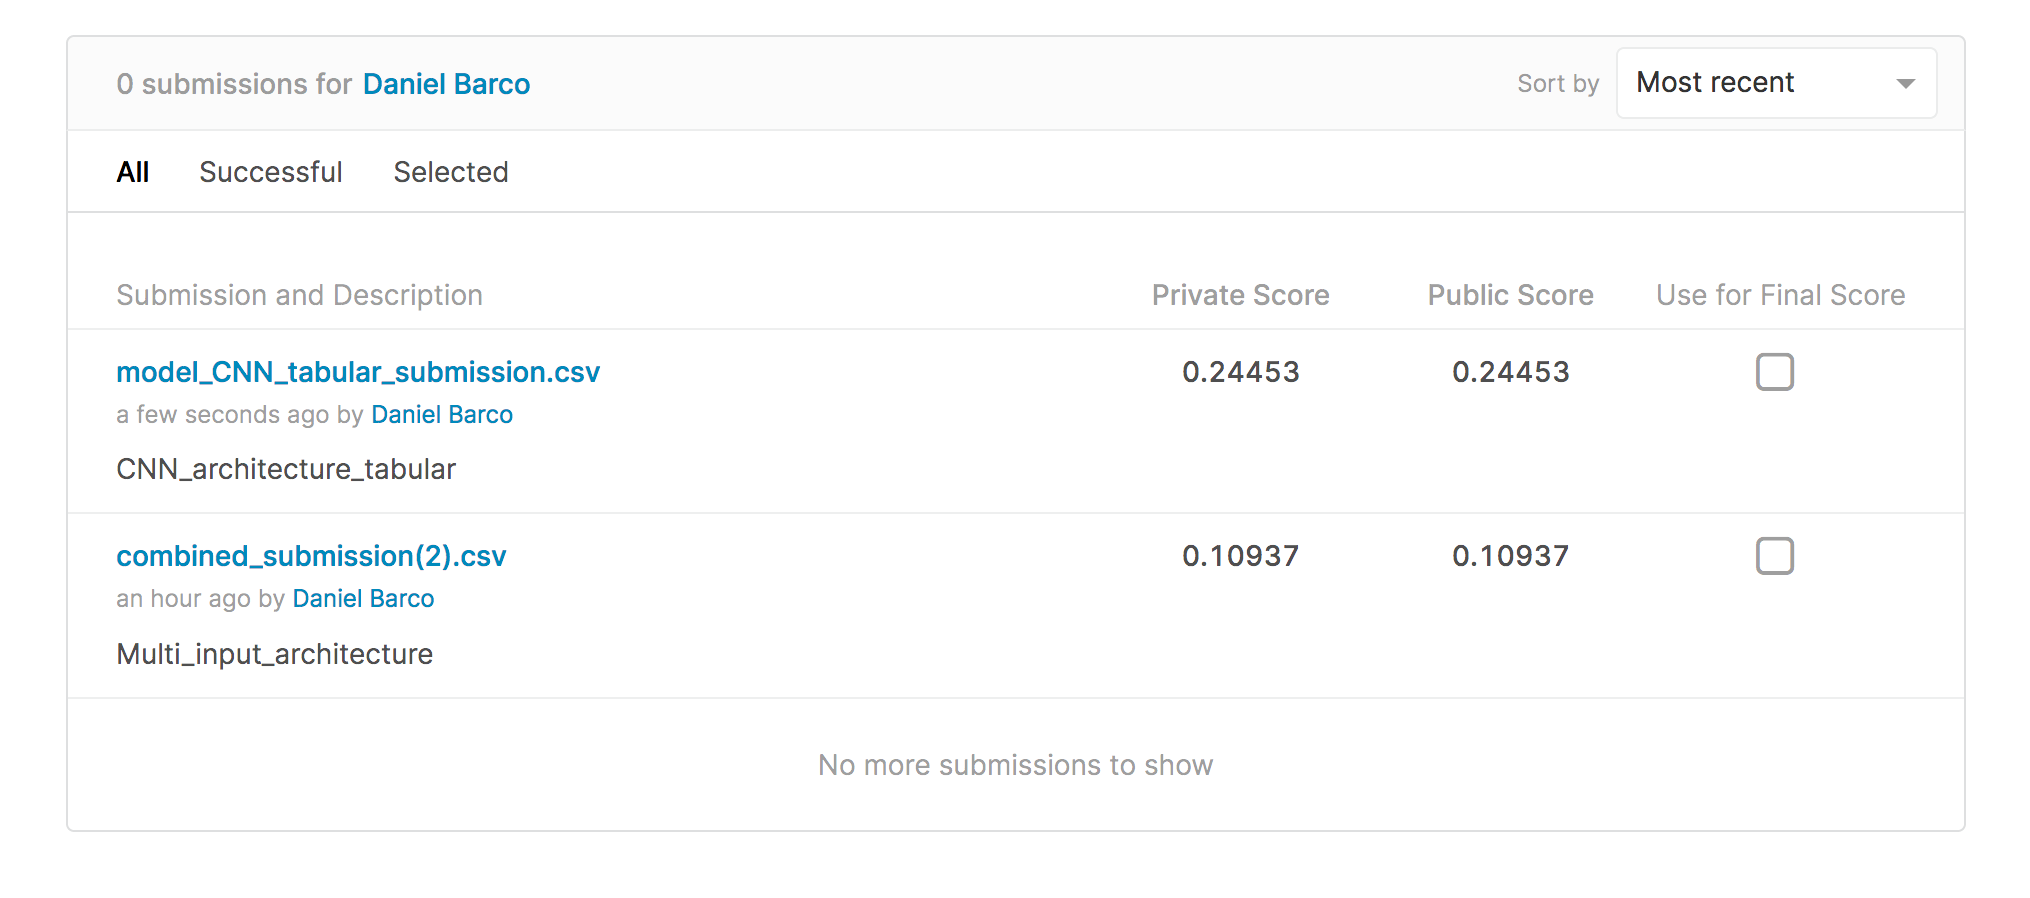

In [ ]:
Image(filename='pictures/3.png', width=1000 , height=500)